In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble._forest import RandomForestRegressor as rf
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
def info_graph(*file):
    model = rf(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18) 
    
    colorNum = 0
    for i in file:
        colorNum += 1
        # DATA 
        data = pd.read_csv(i)

        # FORMATTING THE DATE
        value = 0
        try:
            datetime.strptime(data['Date'][0], '%Y-%m-%d')
            value = 0
        except ValueError:
            value = 1
        if value == 1:
            data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
        else:
            data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
        data.index = data['Date']

        # SORTING THE DATA
        data_sort = data.sort_index(ascending=True, axis=0)
        new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

        # NEW DATASET WITH ONLY THE TWO COLUMNS NECESSARY
        for i in range(0,len(data_sort)):
            new_data['Date'][i] = data_sort['Date'][i]
            new_data['Close'][i] = data_sort['Close'][i]

        new_data['Date'] = new_data['Date'].apply(pd.Timestamp.timestamp)
        new_data['Close'] = new_data['Close']

        pd.DataFrame(new_data)

        # DIVIDING TEST AND TRAIN CASES
        number = int(0.8*len(new_data['Close']))
        train = new_data[:number]
        test = new_data[number:]

        trainX = train.drop('Close', axis=1)
        trainY = train['Close']
        testX = test.drop('Close', axis=1)
        testY = test['Close']

        # SCALING THE DATA
        pd.options.mode.chained_assignment = None
        scaler = MinMaxScaler(feature_range=(0, 1))

        trainX_scaled = scaler.fit_transform(trainX)
        trainX = pd.DataFrame(trainX_scaled)
        testX_scaled = scaler.fit_transform(testX)
        testX = pd.DataFrame(testX_scaled)

        # MODEL
        model.fit(trainX,trainY)

        # PREDICTIONS
        preds = []
        preds = model.predict(testX)

        # PREDICTIONS GRAPH
        test['Predictions'] = 0
        test['Predictions'] = preds

        # INDEXING THE DATA TO YEARS
        test.index = new_data[number:].index
        train.index = new_data[:number].index

        # PLOTTING THE GRAPH
        new_data['Close'].plot(label = f'COMPANY {colorNum}: DATA')
        test['Predictions'].plot(label = f'COMPANY {colorNum}: PREDICTION')

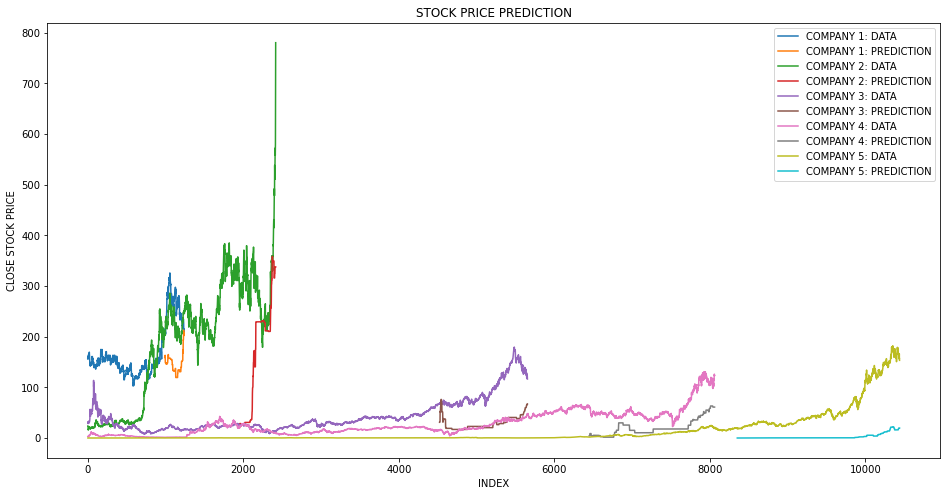

In [3]:
plt.figure(figsize=(16,8))
info_graph('NSE-TATAGLOBAL11.csv','TSLA.csv','A.csv', 'AN.csv', 'AAPL.csv')
plt.title('STOCK PRICE PREDICTION')
plt.xlabel('INDEX')
plt.ylabel('CLOSE STOCK PRICE')
plt.legend()